In [2]:
import tensorflow        as tf
import matplotlib.pyplot as plt
import numpy             as np
import random

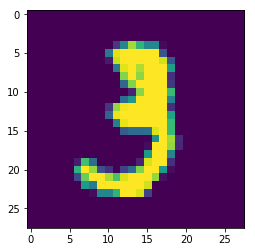

In [3]:
mnist = tf.keras.datasets.mnist

(X_train, y_train),(X_test, y_test) = mnist.load_data()

Image  = np.array(X_train[10], dtype='float')
Pixels = Image.reshape((28, 28))

plt.imshow(Pixels)
plt.show()

In [4]:
print(y_train[10])

3


In [5]:
X_train = X_train/255.0

In [6]:
def NeuronLayer(NumberNeurons,NumberInputs):
    return np.random.random((NumberInputs,NumberNeurons))

In [7]:
def Sigmoid(x):
    return 1/(1 + np.exp(-x))

In [8]:
def SigmoidDerivative(x):
    return x*(1-x)

In [9]:
len(X_train)

60000

In [10]:
Layer1 = NeuronLayer(100,28*28) 
Layer2 = NeuronLayer(50,100)
Layer3 = NeuronLayer(10,50)

def GetOutput(SingleInput):
    Layer1Output = Sigmoid(np.dot(SingleInput ,Layer1))
    Layer2Output = Sigmoid(np.dot(Layer1Output,Layer2))
    Layer3Output = Sigmoid(np.dot(Layer2Output,Layer3))
    return Layer1Output,Layer2Output,Layer3Output

def Train(TrainingSetInputs,TrainingSetOutputs):
    global Layer1
    global Layer2
    global Layer3
    for Index,Image in enumerate(TrainingSetInputs):
        Input = Image.reshape((1,28*28))
        out1,out2,out3 = GetOutput(Input)
        
        y        = TrainingSetOutputs[Index]
        out      = np.zeros(10)
        out[y-1] = 1.0
        
        error3 = out - out3
        delta3 = error3 * SigmoidDerivative(out3)
        
        error2 = np.dot(delta3,Layer3.T)
        delta2 = error2 * SigmoidDerivative(out2)
               
        error1 = np.dot(delta2,Layer2.T)
        delta1 = error1 * SigmoidDerivative(out1)
        
        adjustment1 = np.dot(Input.T,delta1)
        adjustment2 = np.dot(out1.T ,delta2)
        adjustment3 = np.dot(out2.T ,delta3)
        
        Layer1 += adjustment1 
        Layer2 += adjustment2 
        Layer3 += adjustment3
    return error3
        


In [11]:
err = Train(X_train,y_train)

print(err)

[[-1.00000000e+00 -1.00000000e+00 -1.00000000e+00 -1.00000000e+00
  -1.00000000e+00 -1.00000000e+00 -1.00000000e+00  2.48020493e-10
  -1.00000000e+00 -1.00000000e+00]]


In [12]:
x,y,out = GetOutput(X_train[10].reshape((1,28*28)))

In [13]:
out

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])